# Importing libraries and Loading Dataset

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report
import seaborn as sns

In [3]:
data=pd.read_csv("digital_marketing_campaign_dataset.csv")
data.columns


Index(['CustomerID', 'Age', 'Gender', 'Income', 'CampaignChannel',
       'CampaignType', 'AdSpend', 'ClickThroughRate', 'ConversionRate',
       'WebsiteVisits', 'PagesPerVisit', 'TimeOnSite', 'SocialShares',
       'EmailOpens', 'EmailClicks', 'PreviousPurchases', 'LoyaltyPoints',
       'AdvertisingPlatform', 'AdvertisingTool', 'Conversion'],
      dtype='object')

In [4]:
data.shape
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   CustomerID           8000 non-null   int64  
 1   Age                  8000 non-null   int64  
 2   Gender               8000 non-null   object 
 3   Income               8000 non-null   int64  
 4   CampaignChannel      8000 non-null   object 
 5   CampaignType         8000 non-null   object 
 6   AdSpend              8000 non-null   float64
 7   ClickThroughRate     8000 non-null   float64
 8   ConversionRate       8000 non-null   float64
 9   WebsiteVisits        8000 non-null   int64  
 10  PagesPerVisit        8000 non-null   float64
 11  TimeOnSite           8000 non-null   float64
 12  SocialShares         8000 non-null   int64  
 13  EmailOpens           8000 non-null   int64  
 14  EmailClicks          8000 non-null   int64  
 15  PreviousPurchases    8000 non-null   i

In [5]:
# Statistical analysis of categorical columns
data.describe(include='object')

,Gender,CampaignChannel,CampaignType,AdvertisingPlatform,AdvertisingTool
count,8000,8000,8000,8000,8000
unique,2,5,4,1,1
top,Female,Referral,Conversion,IsConfid,ToolConfid
freq,4839,1719,2077,8000,8000


In [6]:
# statistical analysis of numerical columns
data.describe()

,CustomerID,Age,Income,AdSpend,ClickThroughRate,ConversionRate,WebsiteVisits,PagesPerVisit,TimeOnSite,SocialShares,EmailOpens,EmailClicks,PreviousPurchases,LoyaltyPoints,Conversion
count,8000.00000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000
mean,11999.50000,43.625500,84664.196750,5000.944830,0.154829,0.104389,24.751625,5.549299,7.727718,49.799750,9.476875,4.467375,4.485500,2490.268500,0.876500
std,2309.54541,14.902785,37580.387945,2838.038153,0.084007,0.054878,14.312269,2.607358,4.228218,28.901165,5.711111,2.856564,2.888093,1429.527162,0.329031
min,8000.00000,18.000000,20014.000000,100.054813,0.010005,0.010018,0.000000,1.000428,0.501669,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9999.75000,31.000000,51744.500000,2523.221165,0.082635,0.056410,13.000000,3.302479,4.068340,25.000000,5.000000,2.000000,2.000000,1254.750000,1.000000
50%,11999.50000,43.000000,84926.500000,5013.440044,0.154505,0.104046,25.000000,5.534257,7.682956,50.000000,9.000000,4.000000,4.000000,2497.000000,1.000000
75%,13999.25000,56.000000,116815.750000,7407.989369,0.228207,0.152077,37.000000,7.835756,11.481468,75.000000,14.000000,7.000000,7.000000,3702.250000,1.000000
max,15999.00000,69.000000,149986.000000,9997.914781,0.299968,0.199995,49.000000,9.999055,14.995311,99.000000,19.000000,9.000000,9.000000,4999.000000,1.000000


# Data Cleaning
- No Missing values exist in data
- Data has no outliers

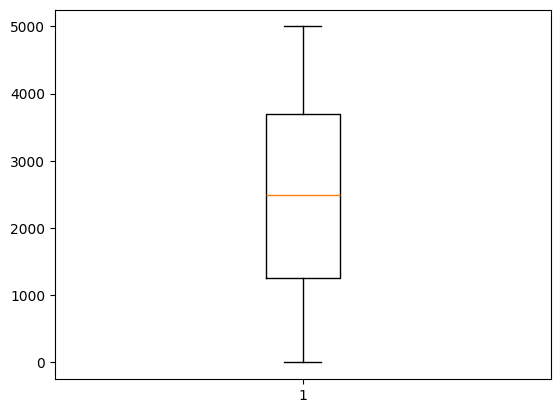

In [7]:
# It looks like LoyaltyPoint Column has outliers
plt.boxplot(data=data, x=data['LoyaltyPoints'])
plt.show()

# IT has no outliers 

In [8]:
# Checking format/classes for categorical columns
categorical_columns=["Gender","CampaignChannel","CampaignType","AdvertisingPlatform","AdvertisingTool"]
for each in categorical_columns:
    print(data[each].value_counts())
    print("-"*50)

Gender
Female    4839
Male      3161
Name: count, dtype: int64
--------------------------------------------------
CampaignChannel
Referral        1719
PPC             1655
Email           1557
SEO             1550
Social Media    1519
Name: count, dtype: int64
--------------------------------------------------
CampaignType
Conversion       2077
Awareness        1988
Consideration    1988
Retention        1947
Name: count, dtype: int64
--------------------------------------------------
AdvertisingPlatform
IsConfid    8000
Name: count, dtype: int64
--------------------------------------------------
AdvertisingTool
ToolConfid    8000
Name: count, dtype: int64
--------------------------------------------------


# Feature Engineering


In [9]:
data.columns

Index(['CustomerID', 'Age', 'Gender', 'Income', 'CampaignChannel',
       'CampaignType', 'AdSpend', 'ClickThroughRate', 'ConversionRate',
       'WebsiteVisits', 'PagesPerVisit', 'TimeOnSite', 'SocialShares',
       'EmailOpens', 'EmailClicks', 'PreviousPurchases', 'LoyaltyPoints',
       'AdvertisingPlatform', 'AdvertisingTool', 'Conversion'],
      dtype='object')

In [10]:
# Creating age category column for better age based analysis
conditions=[
    (data['Age']<=20),
    (data['Age']<=50),
    (data['Age']>50)
]
categories=['Teenager','Young','Old']
data['Age_Categories']=np.select(conditions,categories,default='Unknown Age Category')  # this method select choices based on data
data['Age_Categories'].value_counts()

Age_Categories
Young       4626
Old         2925
Teenager     449
Name: count, dtype: int64

In [11]:
data['Income'].describe()

count      8000.000000
mean      84664.196750
std       37580.387945
min       20014.000000
25%       51744.500000
50%       84926.500000
75%      116815.750000
max      149986.000000
Name: Income, dtype: float64

In [12]:
# For better income related analysis we will create an income-category column in dataset
column_25percent= 51744.500000
column_50percent= 84926.500000
column_75percent= 116815.750000
conditions=[
    (data['Income']<=column_25percent),
    (data['Income']<=column_50percent),
    (data['Income']<=column_75percent),
    (data['Income']>column_75percent)
]
choices=['Lower_Class',"Middle_Class","Upper_Class","Elite_Class"]
data['Income_Class']=np.select(conditions,choices,default='No-Category')
data['Income_Class'].value_counts()

# I have divided the column numerical values into categorical classes for clear understanding and better analysis using pandas

Income_Class
Elite_Class     2000
Lower_Class     2000
Upper_Class     2000
Middle_Class    2000
Name: count, dtype: int64

# Finding  Insights and EDA

In [13]:
gender_conversionrate=data.groupby("Gender")['ConversionRate'].mean().reset_index()
gender_conversionrate

,Gender,ConversionRate
0,Female,0.104123
1,Male,0.104796


In [14]:
# 2.Which Gender segment exhibits the highest Click-Through Rate?
sex_based_clickrate=data.groupby("Gender")['ClickThroughRate'].mean().reset_index()
sex_based_clickrate
# both genders have same clickrate and conversion rate

,Gender,ClickThroughRate
0,Female,0.154868
1,Male,0.154768


In [15]:
# Age category wise conversion rate
age_based_conversionrate=data.groupby("Age_Categories")['ConversionRate'].mean().reset_index()
age_based_conversionrate

,Age_Categories,ConversionRate
0,Old,0.105881
1,Teenager,0.103900
2,Young,0.103493


In [16]:
# Age category wise clickthroughrate
age_based_clickthroughrate=data.groupby("Age_Categories")['ClickThroughRate'].mean().reset_index()
age_based_clickthroughrate

# All age categories have same click through rate and conversion rate

,Age_Categories,ClickThroughRate
0,Old,0.155088
1,Teenager,0.154609
2,Young,0.154686


In [17]:
# Income class wise ConversionRate
income_based_conversionrate=data.groupby("Income_Class")['ConversionRate'].mean().reset_index()
income_based_conversionrate

,Income_Class,ConversionRate
0,Elite_Class,0.105780
1,Lower_Class,0.103141
2,Middle_Class,0.104305
3,Upper_Class,0.104330


In [18]:
# Income Class wise clickthroughrate
income_based_clickthroughrate=data.groupby("Income_Class")['ClickThroughRate'].mean().reset_index()
income_based_clickthroughrate

#All income Classes have same click through rate and conversion rate
#don't prefer any specific gender, age category, or income class for increasing the click-through rate 
# or conversion rate .

,Income_Class,ClickThroughRate
0,Elite_Class,0.155149
1,Lower_Class,0.154210
2,Middle_Class,0.152231
3,Upper_Class,0.157725


In [19]:
# 7.	Which Campaign Channel has the top 10 highest Click-Through Rates?
channel_based_clickrate=data.groupby("CampaignChannel")['ClickThroughRate'].mean().reset_index()
channel_based_clickrate

,CampaignChannel,ClickThroughRate
0,Email,0.155609
1,PPC,0.158307
2,Referral,0.151673
3,SEO,0.153150
4,Social Media,0.155523


In [20]:
#  7.	Which Campaign Channel has the top 10 highest conversion Rates?
channel_based_conversionrate=data.groupby("CampaignChannel")['ConversionRate'].mean().reset_index()
channel_based_conversionrate
# All compaign channels have approximately equal conversion rates, clickthrough rates

,CampaignChannel,ConversionRate
0,Email,0.104884
1,PPC,0.104132
2,Referral,0.103051
3,SEO,0.103530
4,Social Media,0.106550


In [21]:
# 7.	Which Campaign type has the top 10 highest Click-Through Rates?
compaigntype_based_conversionrate=data.groupby("CampaignType")['ConversionRate'].mean().reset_index()
compaigntype_based_conversionrate
# All compaign types have approximately equal conversion rates, clickthrough rates

,CampaignType,ConversionRate
0,Awareness,0.104372
1,Consideration,0.105069
2,Conversion,0.104859
3,Retention,0.103210


In [22]:
# 15.	Who are the top 10 customers with the highest values for websitevisits
top_website_visitors=data.groupby('CustomerID')['WebsiteVisits'].sum().sort_values(ascending=False).head(10)
top_website_visitors

CustomerID
13098    49
14485    49
13024    49
13011    49
13022    49
12946    49
8420     49
9761     49
9746     49
9423     49
Name: WebsiteVisits, dtype: int64

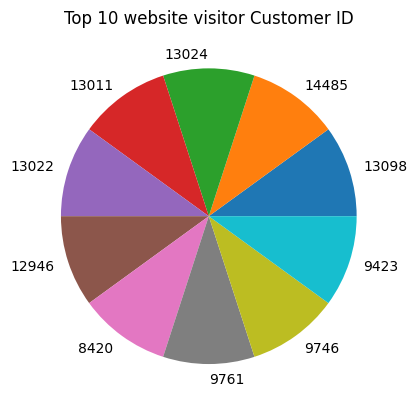

In [23]:
# Visualizing of top 10 website visitor customers
plt.pie(x=top_website_visitors.values, labels=top_website_visitors.index, data=data)
plt.title("Top 10 website visitor Customer ID")
plt.show()

In [ ]:
# 17.	Which are the top 10 customers with the highest volume of Previous Purchases?
top_highest_purchasers=data.groupby("CustomerID")['PreviousPurchases'].sum().sort_values(ascending=False).head(10)
top_highest_purchasers
# 18.	Which are the top 10 customers with the lowest volume of Previous Purchases?


CustomerID
15994    9
15999    9
10432    9
10437    9
10445    9
10450    9
10452    9
10456    9
10361    9
15899    9
Name: PreviousPurchases, dtype: int64

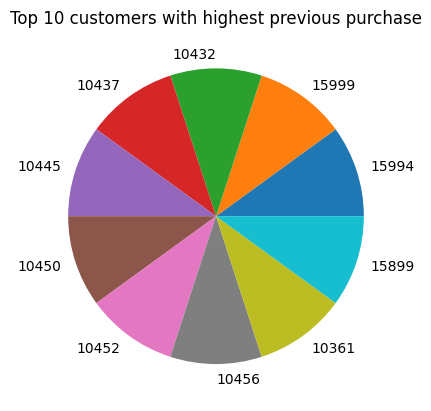

In [52]:
# Visualizing top 10 customers with the highest previous purchases
plt.pie(x=top_highest_purchasers.values, labels=top_highest_purchasers.index, data=data)
plt.title("Top 10 customers with highest previous purchase")
plt.show()

In [25]:
# .	What is the correlation between Income and Conversion Rate?
income_conversionRate=data['Income'].corr(data['ConversionRate'])
income_conversionRate
# There is no linear relationship 

np.float64(0.017551830011560826)

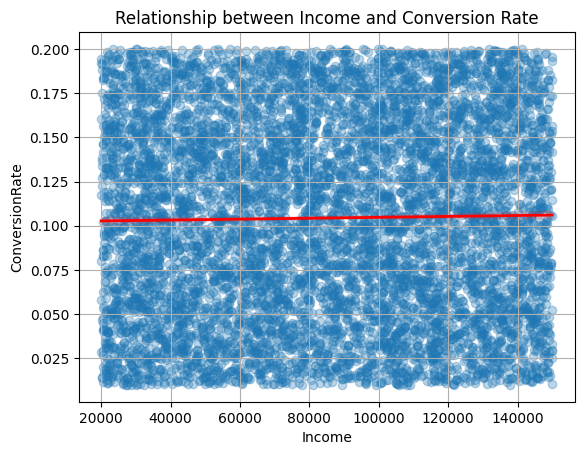

In [26]:
import seaborn as sns
plt.title("Relationship between Income and Conversion Rate")
sns.regplot(x=data['Income'],y=data['ConversionRate'], data=data,
            scatter_kws={'alpha': 0.3},  # make points more transparent
            line_kws={'color': 'red', 'lw': 2}) # lw=line width
plt.grid(True)
plt.show()

# no linear relationship between income and coversion rate

In [27]:
# Linear Relationship betwwen Ad Spend and Conversion Rate
adspend_conversionrate=data['AdSpend'].corr(data['ConversionRate'])
adspend_conversionrate

np.float64(-0.020184847133302375)

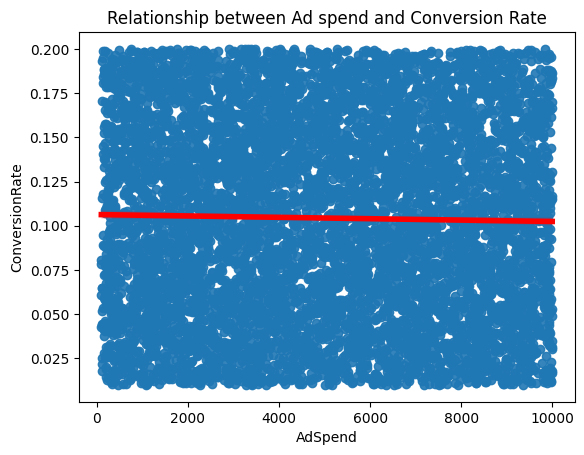

In [28]:
# visualizing relationship between Adspend and conversion rate relationship
plt.title("Relationship between Ad spend and Conversion Rate")
sns.regplot(x=data['AdSpend'],y=data['ConversionRate'], data=data,
            scatter_kws={'alpha':0.9},
            line_kws={'color':'red','lw':4})
plt.show()

# No linear relationship between Conversion Rate and AdSpend
# There is no linear relationship between any two numerical columns every column is independ

In [29]:
# 23.	What is the correlation between Email Opens and Email Clicks?
emailopen_clicked=data['EmailClicks'].corr(data['EmailOpens'])
emailopen_clicked

np.float64(0.0014097221070072216)

In [30]:
# What is the correlation between Time On Site and Loyality Points
time_loyaltypoints=data['TimeOnSite'].corr(data['LoyaltyPoints'])
time_loyaltypoints

np.float64(-0.01095179090219146)

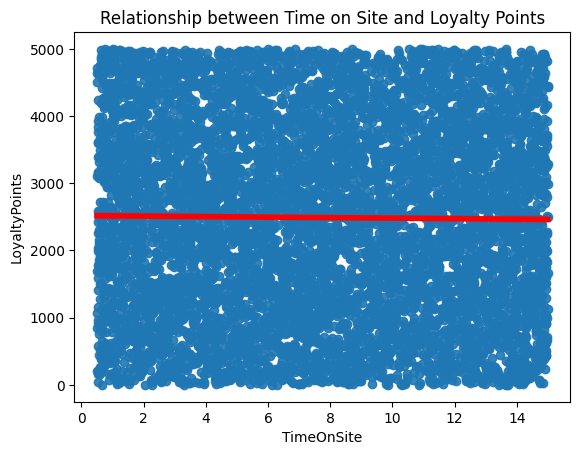

In [31]:
# Correlatin graph of Time on Site and Loyalty Points
plt.title("Relationship between Time on Site and Loyalty Points")
sns.regplot(x=data['TimeOnSite'],y=data['LoyaltyPoints'], data=data,
            scatter_kws={'alpha':0.9},
            line_kws={'color':'red','lw':4})
plt.show()


# Preparing data for ML model

In [32]:
X=data.drop(['Conversion','CustomerID','Age_Categories','Income_Class'],axis=1)
y=data['Conversion']

In [33]:
# Separating categorical and numerical columns
numerical_columns=[]
categorical_columns=[]
for each in X.columns:
    if X[each].dtype=='object':
        categorical_columns.append(each)
    else:
        numerical_columns.append(each)

print(numerical_columns)
print(categorical_columns)

['Age', 'Income', 'AdSpend', 'ClickThroughRate', 'ConversionRate', 'WebsiteVisits', 'PagesPerVisit', 'TimeOnSite', 'SocialShares', 'EmailOpens', 'EmailClicks', 'PreviousPurchases', 'LoyaltyPoints']
['Gender', 'CampaignChannel', 'CampaignType', 'AdvertisingPlatform', 'AdvertisingTool']


In [34]:
# Scaling numerical Columns using MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
for each in numerical_columns:
    print(data[each].head())
    data[each]=scaler.fit_transform(data[[each]])
    print(data[each].head())



0    56
1    69
2    46
3    32
4    60
Name: Age, dtype: int64
0    0.745098
1    1.000000
2    0.549020
3    0.274510
4    0.823529
Name: Age, dtype: float64
0    136912
1     41760
2     88456
3     44085
4     83964
Name: Income, dtype: int64
0    0.899409
1    0.167313
2    0.526590
3    0.185201
4    0.492029
Name: Income, dtype: float64
0    6497.870068
1    3898.668606
2    1546.429596
3     539.525936
4    1678.043573
Name: AdSpend, dtype: float64
0    0.646384
1    0.383781
2    0.146130
3    0.044401
4    0.159427
Name: AdSpend, dtype: float64
0    0.043919
1    0.155725
2    0.277490
3    0.137611
4    0.252851
Name: ClickThroughRate, dtype: float64
0    0.116958
1    0.502547
2    0.922480
3    0.440078
4    0.837507
Name: ClickThroughRate, dtype: float64
0    0.088031
1    0.182725
2    0.076423
3    0.088004
4    0.109940
Name: ConversionRate, dtype: float64
0    0.410648
1    0.909094
2    0.349542
3    0.410505
4    0.525971
Name: ConversionRate, dtype: float64
0     0

In [35]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
for each in categorical_columns:
    print(X[each].head())
    X[each]=encoder.fit_transform(X[each])
    print(X[each].head())
    print("*"*30)

data.dtypes

0    Female
1      Male
2    Female
3    Female
4    Female
Name: Gender, dtype: object
0    0
1    1
2    0
3    0
4    0
Name: Gender, dtype: int64
******************************
0    Social Media
1           Email
2             PPC
3             PPC
4             PPC
Name: CampaignChannel, dtype: object
0    4
1    0
2    1
3    1
4    1
Name: CampaignChannel, dtype: int64
******************************
0     Awareness
1     Retention
2     Awareness
3    Conversion
4    Conversion
Name: CampaignType, dtype: object
0    0
1    3
2    0
3    2
4    2
Name: CampaignType, dtype: int64
******************************
0    IsConfid
1    IsConfid
2    IsConfid
3    IsConfid
4    IsConfid
Name: AdvertisingPlatform, dtype: object
0    0
1    0
2    0
3    0
4    0
Name: AdvertisingPlatform, dtype: int64
******************************
0    ToolConfid
1    ToolConfid
2    ToolConfid
3    ToolConfid
4    ToolConfid
Name: AdvertisingTool, dtype: object
0    0
1    0
2    0
3    0
4    0
Name: Ad

CustomerID               int64
Age                    float64
Gender                  object
Income                 float64
CampaignChannel         object
CampaignType            object
AdSpend                float64
ClickThroughRate       float64
ConversionRate         float64
WebsiteVisits          float64
PagesPerVisit          float64
TimeOnSite             float64
SocialShares           float64
EmailOpens             float64
EmailClicks            float64
PreviousPurchases      float64
LoyaltyPoints          float64
AdvertisingPlatform     object
AdvertisingTool         object
Conversion               int64
Age_Categories          object
Income_Class            object
dtype: object

In [36]:
data['Gender']

0       Female
1         Male
2       Female
3       Female
4       Female
         ...  
7995      Male
7996    Female
7997    Female
7998    Female
7999    Female
Name: Gender, Length: 8000, dtype: object

In [37]:
# Balancing data before modelling to get right results and ensure model is not predicting only one.
from sklearn.utils import resample
import pandas as pd

# Combine features and labels
data = pd.concat([X, y], axis=1)

# Separate classes
majority = data[data['Conversion'] == 0]
minority = data[data['Conversion'] == 1]

# Double the minority class
minority_upsampled = resample(minority,
                              replace=True,     # sample with replacement
                              n_samples=len(minority)*3,  # double it
                              random_state=42)

# Combine again
balanced_data = pd.concat([majority, minority_upsampled])

# Shuffle
balanced_data = balanced_data.sample(frac=1, random_state=42)

# Split back
X_balanced = balanced_data.drop("Conversion", axis=1)
y_balanced = balanced_data['Conversion']


print("Minority and majority lenght after balancing")
print(len(minority))
print(len(majority))

Minority and majority lenght after balancing
7012
988


# Modelling

In [64]:
# importing model
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier(criterion='gini', random_state=42)  # model is getting biased to 1 as predicting all 1s correctly and then conidering 60%+ 0 as positive.

In [65]:
# Train test split
X_train,X_test,y_train,y_test=train_test_split(X_balanced,y_balanced,train_size=0.88)
X_train.shape

(19381, 18)

In [66]:
# Training the model
model.fit(X_train,y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [67]:
# Testing the model/getting predictions
y_pred=model.predict(X_test)
y_pred

array([1, 1, 1, ..., 1, 1, 1])

In [68]:
# Getting cost function/evaluation metrics
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_test,y_pred)
accuracy 

0.9606507756337496

In [69]:
# classification report
report=classification_report(y_test,y_pred,output_dict=True)
print(report)
#   Precision answers, "Of all the items the model predicted as positive, how many were actually positive?" 
#   recall answers, "Of all the actual positive items that exist, how many did the model correctly identify?". 

{'0': {'precision': 0.6037735849056604, 'recall': 0.2782608695652174, 'f1-score': 0.38095238095238093, 'support': 115.0}, '1': {'precision': 0.967953667953668, 'recall': 0.9916930379746836, 'f1-score': 0.9796795623290347, 'support': 2528.0}, 'accuracy': 0.9606507756337496, 'macro avg': {'precision': 0.7858636264296641, 'recall': 0.6349769537699504, 'f1-score': 0.6803159716407079, 'support': 2643.0}, 'weighted avg': {'precision': 0.9521077695236564, 'recall': 0.9606507756337496, 'f1-score': 0.9536282472104896, 'support': 2643.0}}


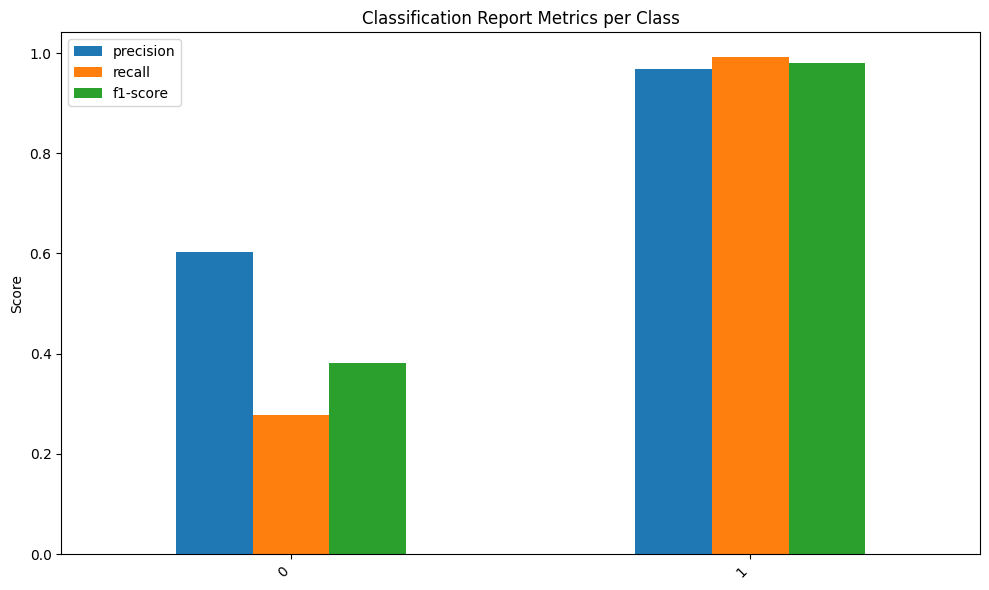

In [70]:
# Visualizing Classification report
df_report=pd.DataFrame(report).transpose()
df_metrics = df_report[['precision', 'recall', 'f1-score']].drop(labels=['accuracy', 'macro avg', 'weighted avg'])
df_metrics.plot(kind='bar', figsize=(10, 6))
plt.title('Classification Report Metrics per Class')
plt.ylabel('Score')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [73]:
# Confusion matrix
from sklearn.metrics import confusion_matrix
matrix=confusion_matrix(y_test,y_pred)
matrix


array([[  32,   83],
       [  21, 2507]])

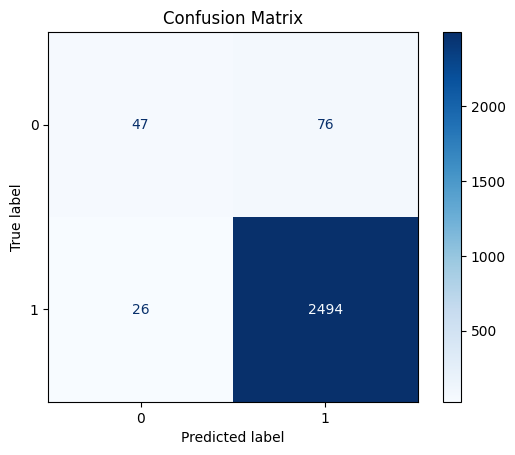

In [ ]:
# Displaying the confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay
display=ConfusionMatrixDisplay(matrix)
display.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

# Homework ANN
Create a regressor with two inputs on mobile data(your own) and then use activation function(linear), loss=MSE using tensorflow or pytorch.